In [ ]:
import zipfile
import os

with zipfile.ZipFile("gesture_dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/gesture_dataset")

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
# Define dataset path
DATASET_PATH = "/content/gesture_dataset/gesture_dataset"  # Change if needed

X = []
y = []
labels = sorted(os.listdir(DATASET_PATH))  # Sorted for consistent label order

label_map = {label: idx for idx, label in enumerate(labels)}
print("Label Mapping:", label_map)

IMG_SIZE = 100

for label in labels:
    path = os.path.join(DATASET_PATH, label)
    for file in os.listdir(path):
        img_path = os.path.join(path, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X.append(img)
        y.append(label_map[label])

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0
y = to_categorical(y)

print("✅ Dataset Loaded:", X.shape, y.shape)


Label Mapping: {'HI': 0, 'down': 1, 'one': 2, 'small': 3, 'three': 4, 'two': 5, 'up': 6}
✅ Dataset Loaded: (192, 100, 100, 1) (192, 7)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Train size:", X_train.shape, "Test size:", X_test.shape)

Train size: (153, 100, 100, 1) Test size: (39, 100, 100, 1)


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(labels), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 98, 98, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     4,333,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,353,415 (16.61 MB)

 Trainable params: 4,353,415 (16.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=32)

Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 646ms/step - accuracy: 0.1599 - loss: 2.0521 - val_accuracy: 0.3846 - val_loss: 1.8100
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.3415 - loss: 1.7960 - val_accuracy: 0.4615 - val_loss: 1.6917
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4089 - loss: 1.6389 - val_accuracy: 0.4359 - val_loss: 1.4343
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4911 - loss: 1.3854 - val_accuracy: 0.6923 - val_loss: 1.1270
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6106 - loss: 1.1560 - val_accuracy: 0.7949 - val_loss: 0.8557
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7458 - loss: 0.8615 - val_accuracy: 0.8462 - val_loss: 0.6762
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7649 - loss: 0.6628 - val_accuracy: 0.8718 - val_loss: 0.5239
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8522 - loss: 0.4908 - val_accuracy: 0.9231 - val_loss: 0.4084

In [ ]:
model.save("gesture_model.h5")
print("✅ Model saved as gesture_model.h5")

✅ Model saved as gesture_model.h5


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"📊 Test Accuracy: {accuracy*100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9658 - loss: 0.2165
📊 Test Accuracy: 94.87%


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 495ms/step


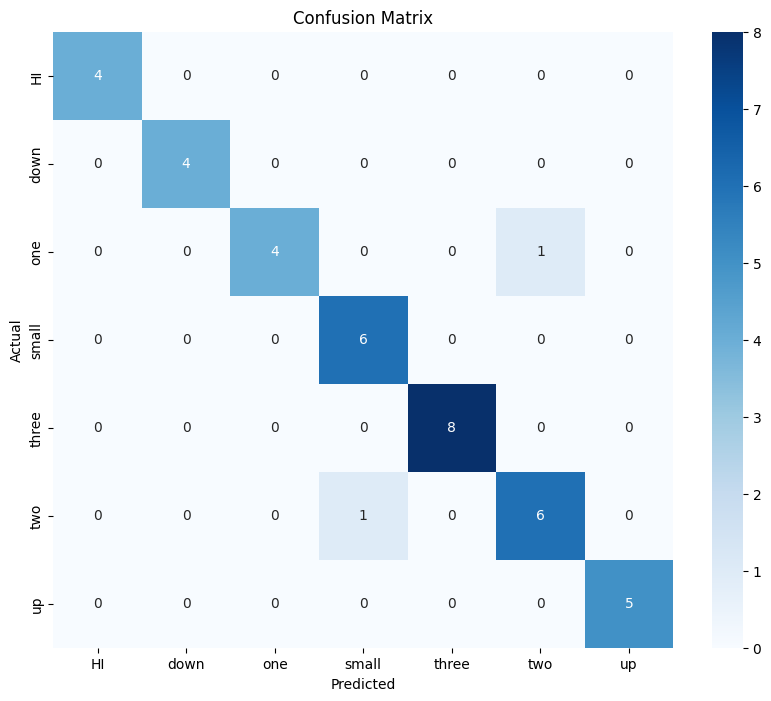

🧾 Classification Report:
              precision    recall  f1-score   support

          HI       1.00      1.00      1.00         4
        down       1.00      1.00      1.00         4
         one       1.00      0.80      0.89         5
       small       0.86      1.00      0.92         6
       three       1.00      1.00      1.00         8
         two       0.86      0.86      0.86         7
          up       1.00      1.00      1.00         5

    accuracy                           0.95        39
   macro avg       0.96      0.95      0.95        39
weighted avg       0.95      0.95      0.95        39



In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("🧾 Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=labels))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


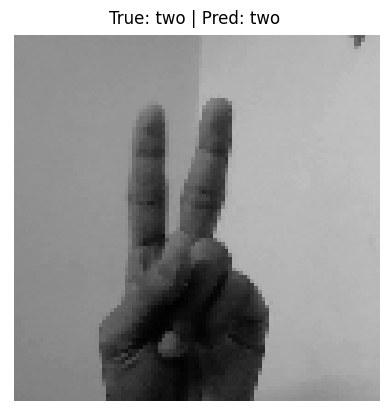

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


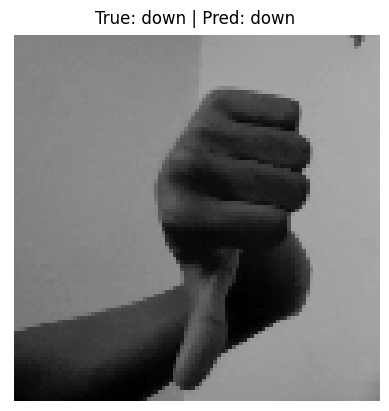

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


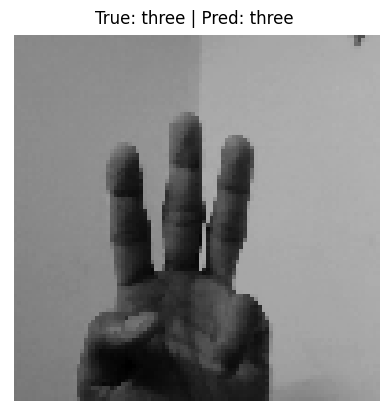

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


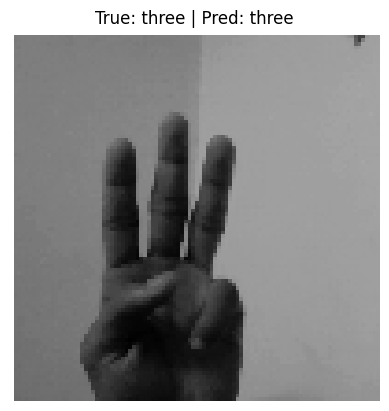

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


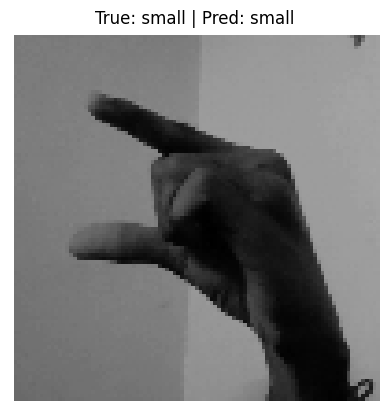

In [ ]:
# Visualize 5 predictions
for i in range(5):
    index = np.random.randint(0, X_test.shape[0])
    img = X_test[index].reshape(IMG_SIZE, IMG_SIZE)
    true_label = labels[np.argmax(y_test[index])]
    pred_label = labels[np.argmax(model.predict(X_test[index:index+1]))]

    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true_label} | Pred: {pred_label}")
    plt.axis('off')
    plt.show()